* Import Libraries



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

* Load Files

In [2]:
books = pd.read_csv('../data/BX_Books.csv', sep=';', encoding='latin-1',low_memory=False)
users = pd.read_csv('../data/BX-Users.csv', sep=';', encoding='latin-1',low_memory=False)
ratings = pd.read_csv('../data/BX-Book-Ratings.csv', sep=';', encoding='latin-1',low_memory=False)

In [3]:

def perform_value_check(df):

    print(df.describe(), end="\n\n")

    missing_values = df.isnull().sum()
    print("missing_values", end="\n")
    print(missing_values, end="\n\n")

    missing_percentage = (df.isnull().sum() / len(df)) * 100
    missing_percentage = missing_percentage[missing_percentage > 0]
    print("missing_percentage", end="\n")
    print(missing_percentage, end="\n\n")

    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(), cmap='Blues')
    plt.title('Missing Values Heatmap')
    plt.show()


In [4]:
books.head()


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


       Year-Of-Publication
count        271379.000000
mean           1959.756050
std             258.011363
min               0.000000
25%            1989.000000
50%            1995.000000
75%            2000.000000
max            2050.000000

missing_values
ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

missing_percentage
Book-Author    0.000737
Publisher      0.000737
dtype: float64



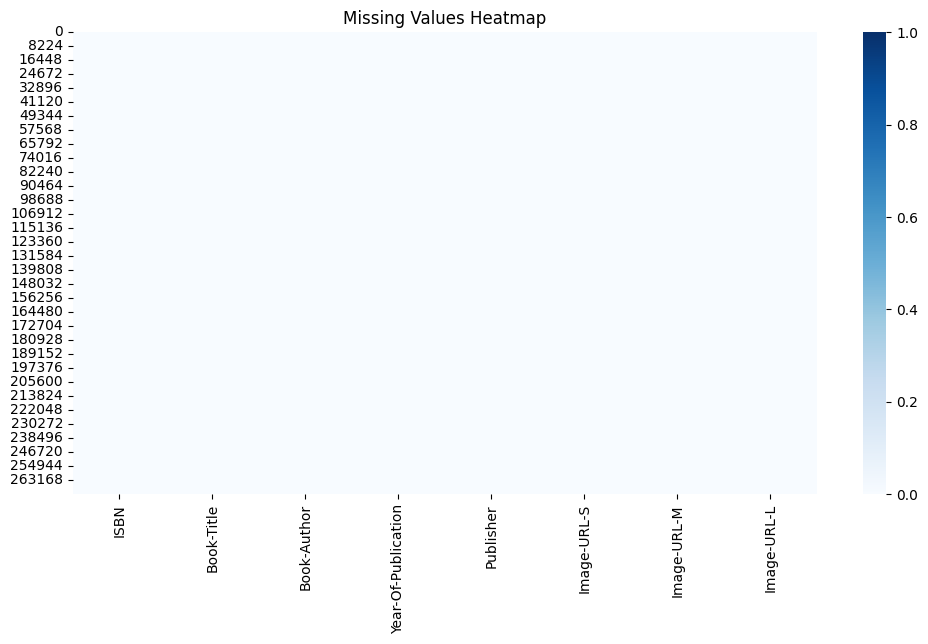

In [5]:
perform_value_check(books)

In [53]:
users.head()


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


            User-ID            Age
count  278858.00000  168096.000000
mean   139429.50000      34.751434
std     80499.51502      14.428097
min         1.00000       0.000000
25%     69715.25000      24.000000
50%    139429.50000      32.000000
75%    209143.75000      44.000000
max    278858.00000     244.000000

missing_values
User-ID          0
Location         0
Age         110762
dtype: int64

missing_percentage
Age    39.719857
dtype: float64



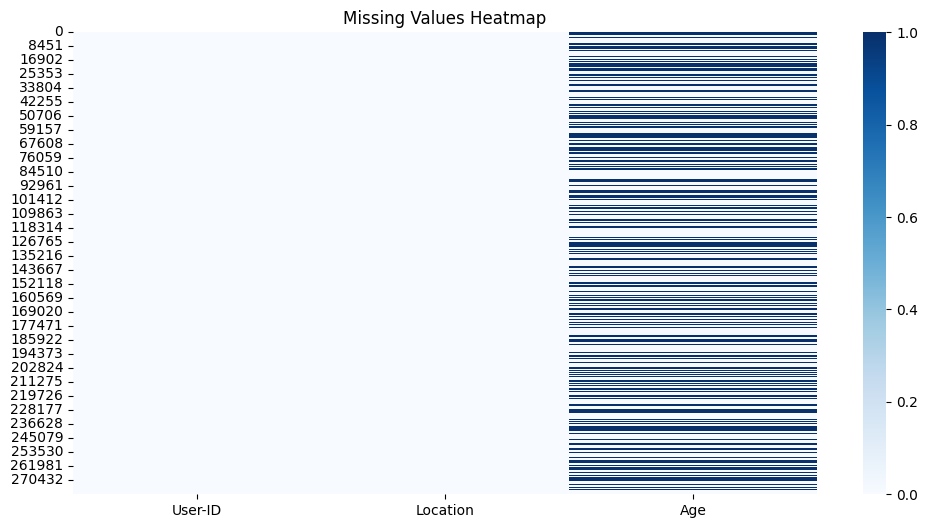

In [65]:
perform_value_check(users)


In [9]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


            User-ID   Book-Rating
count  1.149780e+06  1.149780e+06
mean   1.403864e+05  2.866950e+00
std    8.056228e+04  3.854184e+00
min    2.000000e+00  0.000000e+00
25%    7.034500e+04  0.000000e+00
50%    1.410100e+05  0.000000e+00
75%    2.110280e+05  7.000000e+00
max    2.788540e+05  1.000000e+01

missing_values
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

missing_percentage
Series([], dtype: float64)



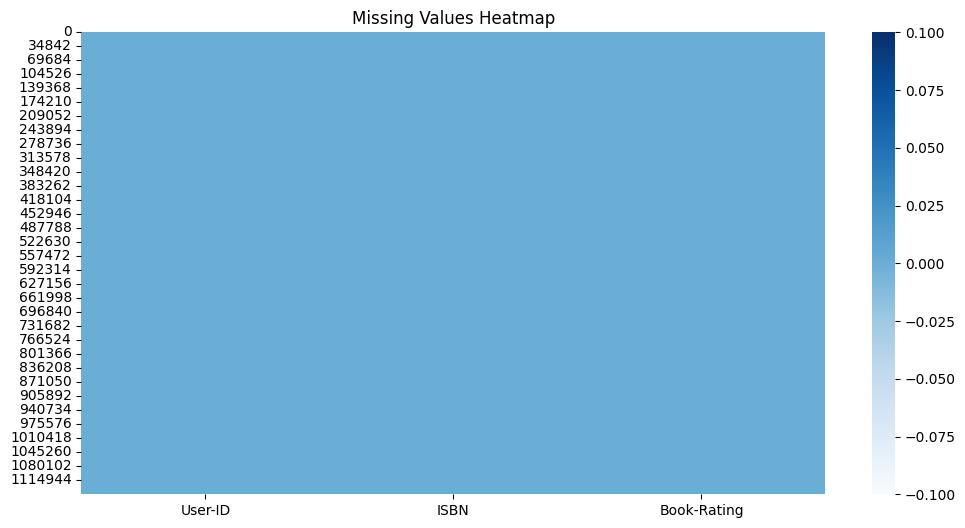

In [66]:
perform_value_check(ratings)


* Change column names to a uniform format

In [10]:
books.columns = books.columns.str.lower().str.replace('-', '_')
users.columns = users.columns.str.lower().str.replace('-', '_')
ratings.columns = ratings.columns.str.lower().str.replace('-', '_')

* Merge the Ratings with Books

In [11]:
ratings_books = pd.merge(ratings, books, on='isbn', how='left')
ratings_books.head()

,user_id,isbn,book_rating,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996.0,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...


            user_id   book_rating  year_of_publication
count  1.149780e+06  1.149780e+06         1.031175e+06
mean   1.403864e+05  2.866950e+00         1.968194e+03
std    8.056228e+04  3.854184e+00         2.311048e+02
min    2.000000e+00  0.000000e+00         0.000000e+00
25%    7.034500e+04  0.000000e+00         1.992000e+03
50%    1.410100e+05  0.000000e+00         1.997000e+03
75%    2.110280e+05  7.000000e+00         2.001000e+03
max    2.788540e+05  1.000000e+01         2.050000e+03

missing_values
user_id                     0
isbn                        0
book_rating                 0
book_title             118605
book_author            118607
year_of_publication    118605
publisher              118607
image_url_s            118605
image_url_m            118605
image_url_l            118605
dtype: int64

missing_percentage
book_title             10.315452
book_author            10.315626
year_of_publication    10.315452
publisher              10.315626
image_url_s            1

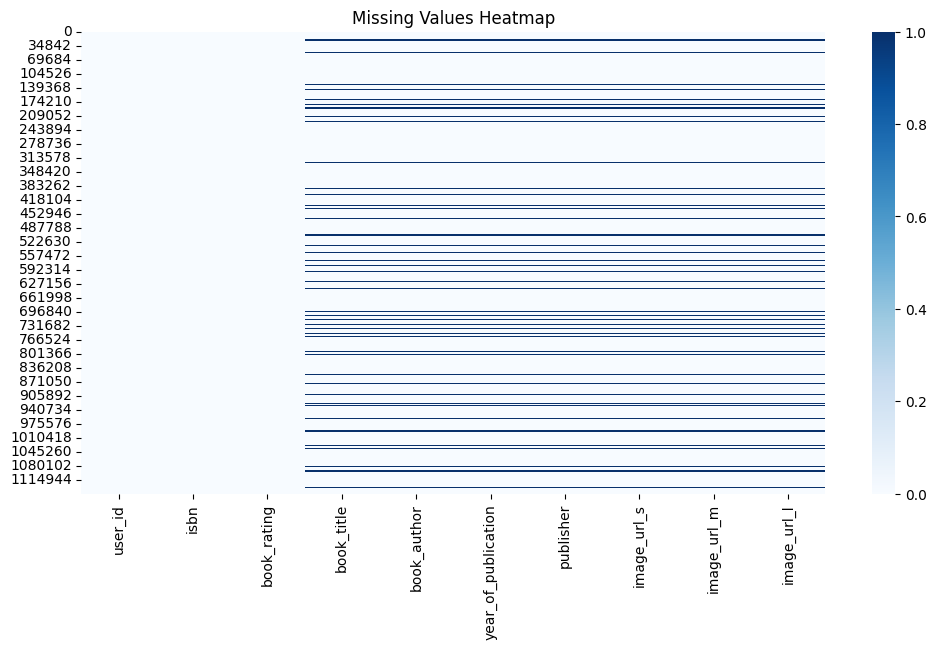

In [67]:
perform_value_check(ratings_books)

* Merge the Ratings_books with Users

In [12]:
final_data = pd.merge(ratings_books, users, on='user_id', how='left')
final_data.head()

,user_id,isbn,book_rating,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,location,age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"tyler, texas, usa",NaN
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,"seattle, washington, usa",NaN
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996.0,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,"h, new south wales, australia",16.0
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,"rijeka, n/a, croatia",16.0
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,"rijeka, n/a, croatia",16.0


* Check for missing values

            user_id   book_rating  year_of_publication           age
count  1.149780e+06  1.149780e+06         1.031175e+06  1.149780e+06
mean   1.403864e+05  2.866950e+00         1.968194e+03  3.663685e+01
std    8.056228e+04  3.854184e+00         2.311048e+02  1.221968e+01
min    2.000000e+00  0.000000e+00         0.000000e+00  0.000000e+00
25%    7.034500e+04  0.000000e+00         1.992000e+03  3.100000e+01
50%    1.410100e+05  0.000000e+00         1.997000e+03  3.500000e+01
75%    2.110280e+05  7.000000e+00         2.001000e+03  4.100000e+01
max    2.788540e+05  1.000000e+01         2.050000e+03  2.440000e+02

missing_values
user_id                     0
isbn                        0
book_rating                 0
book_title             118605
book_author                 0
year_of_publication    118605
publisher                   0
image_url_s            118605
image_url_m            118605
image_url_l            118605
location                    0
age                         0
cit

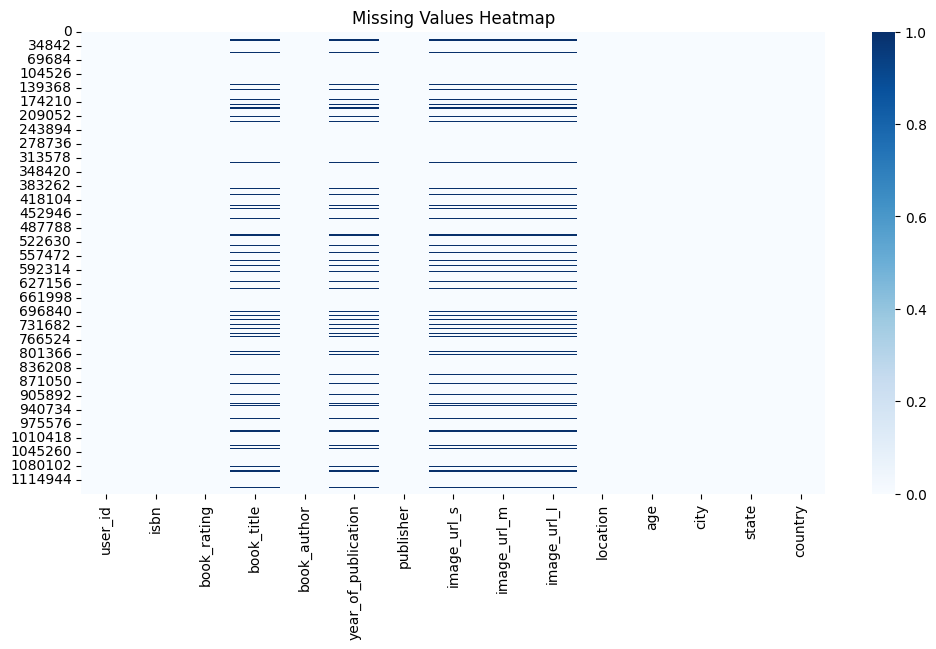

In [73]:
perform_value_check(final_data)

* Handle missing values

In [74]:

final_data['age'] = final_data['age'].fillna(final_data['age'].median())


final_data['location'] = final_data['location'].fillna('Unknown')


final_data['book_author'] = final_data['book_author'].fillna('Unknown Author')
final_data['publisher'] = final_data['publisher'].fillna('Unknown Publisher')

final_data = final_data.dropna()

            user_id   book_rating  year_of_publication           age
count  1.031175e+06  1.031175e+06         1.031175e+06  1.031175e+06
mean   1.405944e+05  2.839022e+00         1.968194e+03  3.675167e+01
std    8.052444e+04  3.854149e+00         2.311048e+02  1.209694e+01
min    2.000000e+00  0.000000e+00         0.000000e+00  0.000000e+00
25%    7.041500e+04  0.000000e+00         1.992000e+03  3.100000e+01
50%    1.412100e+05  0.000000e+00         1.997000e+03  3.500000e+01
75%    2.114260e+05  7.000000e+00         2.001000e+03  4.100000e+01
max    2.788540e+05  1.000000e+01         2.050000e+03  2.440000e+02

missing_values
user_id                0
isbn                   0
book_rating            0
book_title             0
book_author            0
year_of_publication    0
publisher              0
image_url_s            0
image_url_m            0
image_url_l            0
location               0
age                    0
city                   0
state                  0
country      

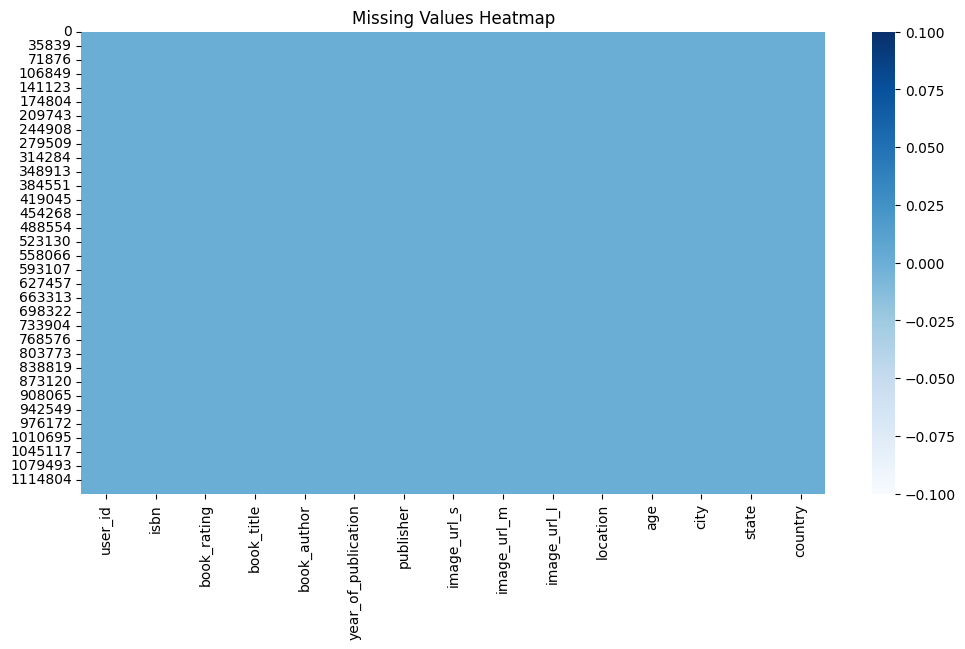

In [75]:
perform_value_check(final_data)

* Split location into different features

In [70]:
location_split = final_data['location'].str.split(',', expand=True)

final_data['city'] = location_split[0].str.strip()
final_data['state'] = location_split[1].str.strip()
final_data['country'] = location_split[2].str.strip()

* Save new dataset

In [72]:
final_data.to_csv('../data/Preprocessed_Books_Data.csv', index=False)